<a href="https://colab.research.google.com/github/psalinas505/python-diabetes/blob/UCIdataset/Python_Diabetes_PS_NN_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITExperience Final ML Python Project


## Project Description


**Python Final Project**

Teammates: Pablo Salinas, Nathalie Nieto, and Brittany Brittany


My Python Project is on Diabetes. 

The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. 

Content:
The datasets consists of several medical predictor variables and one target variable; the Outcome. 

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, etc.

Variables:
Pregnancies,
Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunction,
Age,
and Outcome


**References:**

Towards Data Science: ML Workflow
https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8


Towards Data Science: Prima Indian Diabetes Prediction
https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe


BMC Medical Informatics and Decision Making
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0918-5


Kaggle: Prima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database


GitHub: ML with Python
https://github.com/LahiruTjay/Machine-Learning-With-Python/blob/master/datasets/diabetes.csv


## Libraries and Dataset

In [21]:
# Import Libraries and Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns   ???


In [22]:
# Bring in my dataset

diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetes.csv')


In [23]:
# And examine the dataset 

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [25]:
print(diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [26]:
# example an element of the dataset
print(diabetes.iloc[5])

Pregnancies                   5.000
Glucose                     116.000
BloodPressure                74.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          25.600
DiabetesPedigreeFunction      0.201
Age                          30.000
Outcome                       0.000
Name: 5, dtype: float64


In [27]:
diabetes.shape

(768, 9)

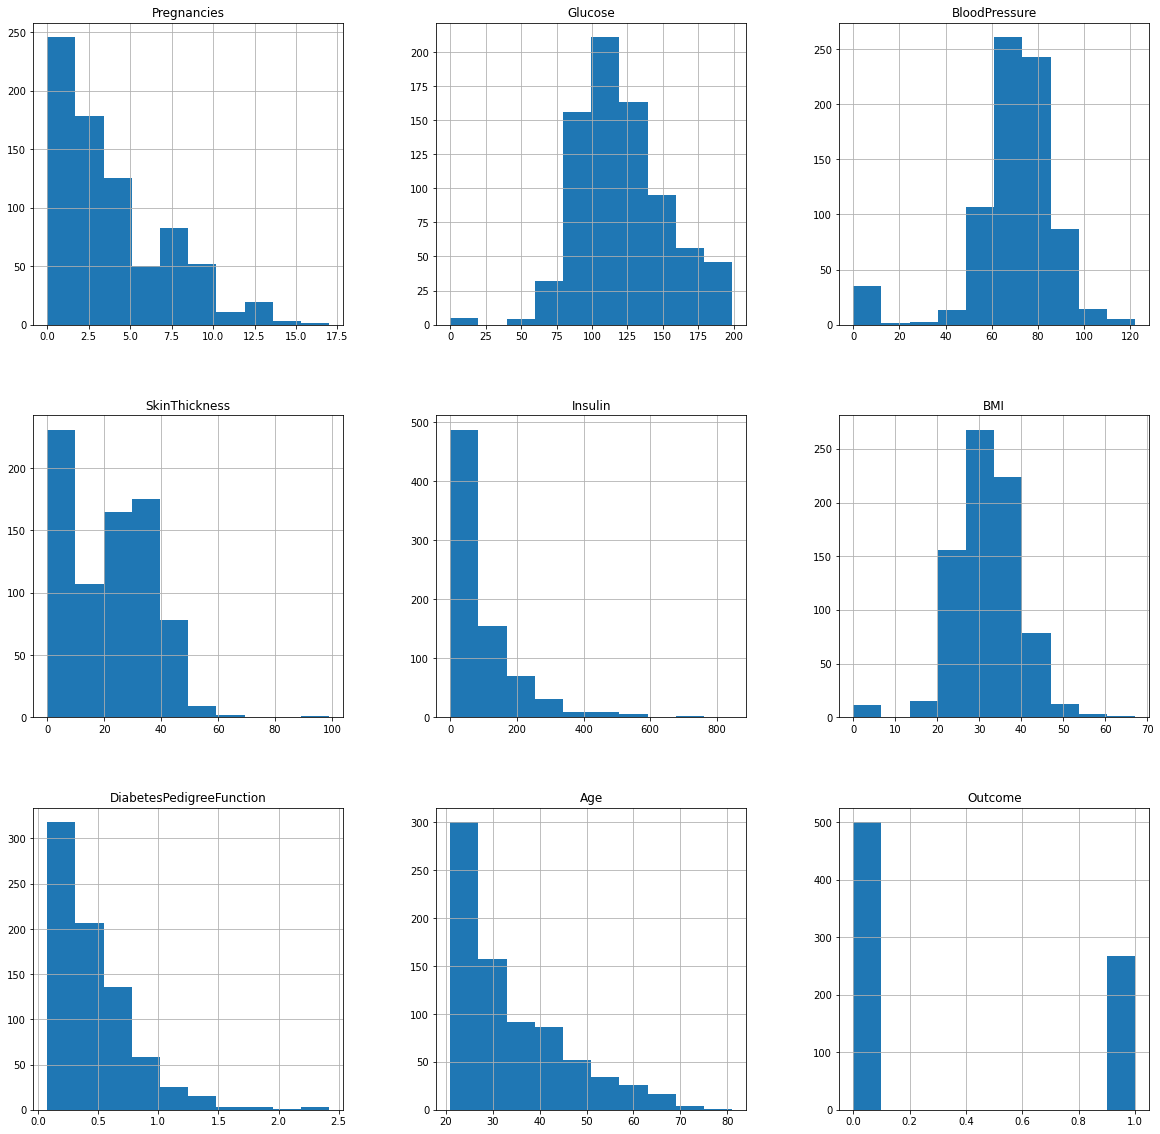

In [28]:
# plot hist of features

diabetes.hist(figsize= (20,20))
plt.show()

In [54]:
diab_pos = diabetes[diabetes['Outcome']==1]
diab_neg = diabetes[diabetes['Outcome']==0]

outlier_frac = len(diab_pos) / len(diab_neg)
print(outlier_frac)

print(f'Positive diabetes cases : {len(diab_pos)}')
print(f'Negative diabetes cases : {len(diab_neg)}')

0.536
Positive diabetes cases : 268
Negative diabetes cases : 500


In [55]:
# 53% representation of diabetes positive cases

In [56]:
# correlation matrix
import seaborn as sns

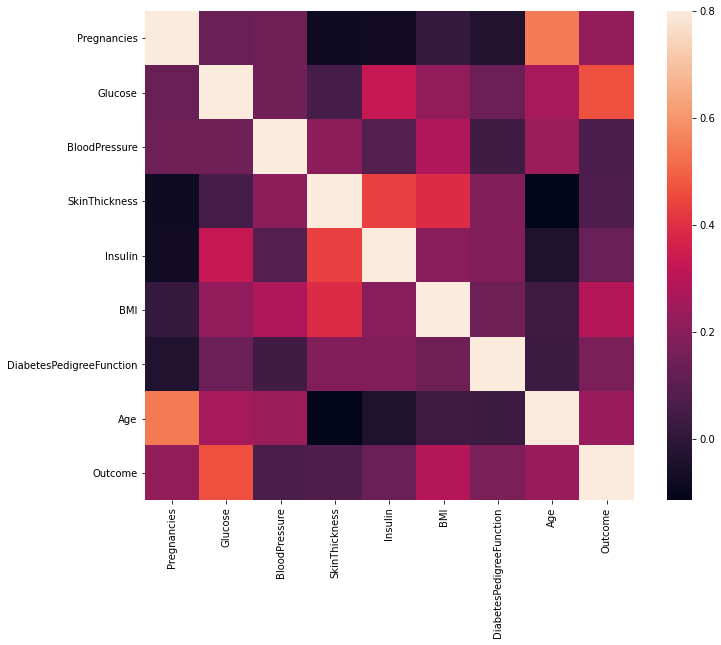

In [57]:
corr_mat = diabetes.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corr_mat, vmax=.8, square = True)
plt.show()

In [58]:
# get the features in a list
columns = diabetes.columns.to_list()

# take out the target column
columns = [i for i in columns if i not in ["Outcome"]]

target = "Outcome"

X = diabetes[columns]
y = diabetes[target]

# check dimensions of var
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [76]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier


In [78]:
# define random state
state = 0

# define classifier
classifiers = {
    'Isolation Forest': IsolationForest(max_samples= len(X),
                                       contamination= 0.5, #outlier_frac,
                                       random_state = state),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = 0.5), #outlier_frac)    
    'K Neighbors Classifier': KNeighborsClassifier()
}

In [83]:
y.shape

(768,)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# split data into train nad test sets for KneighborsClassifier
np.random.seed(0)
indices = np.random.permutation(len(X))
# X_train = X[indices[:-10]]
# y_train = y[indices[:-10]]
# X_test = X[indices[-10:]]
# y_test = y[indices[-10:]]


# Fit the model
n_outliers = len(diab_neg)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag the outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name == 'Isolation Forest':
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
#     elif clf_name == 'K Neighbors Classifier':
#         XX = X_train
#         yy = y_train
#         clf.fit(XX, yy)
        #print(y_pred = knn.predict(X_test))
        #print(y_test)
        
        
        
    #reshape the prediction values to 1 for diabetes positive, 0 for diabetes negative
    y_pred[y_pred == 1]= 1
    y_pred[y_pred == 0]= 0
    y_pred[y_pred == -1] = 0
        
    #calculate number of errors
    n_errors = (y_pred != y).sum()
    
    #run classification metrics
    print(f'{clf_name}: {n_errors}')
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))
    
    # plot confusion matrix

    #                predicted labels and true labels
    print('Confusion Matrix', confusion_matrix(y_pred, y))
    #plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues)
    print('-----------------------------------------')

Isolation Forest: 482
0.3723958333333333
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       500
           1       0.22      0.32      0.26       268

    accuracy                           0.37       768
   macro avg       0.37      0.36      0.36       768
weighted avg       0.42      0.37      0.39       768

Confusion Matrix [[201 183]
 [299  85]]
-----------------------------------------
Local Outlier Factor: 416
0.4583333333333333
              precision    recall  f1-score   support

           0       0.61      0.47      0.53       500
           1       0.31      0.44      0.36       268

    accuracy                           0.46       768
   macro avg       0.46      0.45      0.45       768
weighted avg       0.50      0.46      0.47       768

Confusion Matrix [[234 150]
 [266 118]]
-----------------------------------------
K Neighbors Classifier: 416
0.4583333333333333
              precision    recall  f1-score   sup

In [ ]:
### second dataset

In [ ]:
# Import new dataset (UCI)

diabetes2 = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetic_data.csv')

In [ ]:
# Examine the new dataset (UCI)

diabetes2.head()

In [8]:
diabetes2.shape

(101766, 50)

In [ ]:
# Find the dimensions of the data set using the panda Dataframes: ‘shape’ attribute





## Visualizations

In [ ]:
# Visualization of data

In [ ]:
# Data Cleaning

In [ ]:
# Feature Engineering


## Model Selection


In [ ]:
# Model Selection
